# 1. Загрузка данных

In [1]:
import pandas as pd

df = pd.read_csv("./data/adult.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 2. Первичный анализ данных

## a) проверьте данные на пропуски. Удалите в случае обнаружения.

In [2]:
# Проверка нечисловых значений, вывод уникальных значений
list_of_col = list(df.select_dtypes(include=[object]).columns)

for i in list_of_col:
    print(f"Column - {i}")
    print(df[i].unique())
    print("============")

Column - workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column - education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Column - marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Column - occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Column - relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Column - race
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Column - gender
['Male' 'Female']
Column - native-country
['United-States' '?' 'Peru' 'Guat

In [3]:
# Имеются отсутствующие значения "?" в колонках workclass, native-country, occupation
# Выведем их кол-во

df[["workclass", "native-country", "occupation"]].apply(lambda col: (col == "?").sum())

workclass         2799
native-country     857
occupation        2809
dtype: int64

In [4]:
# Находим кол-во строк, в которых есть "?" хотя бы в одной из указанных колонок
df[
    (df["workclass"] == "?") | (df["native-country"] == "?") | (df["occupation"] == "?")
].shape[0]

3620

In [5]:
# Проверка числовыз значений
list_of_col = list(df.select_dtypes(include=["int64"]).columns)

for i in list_of_col:
    print(f"Column - {i}")
    print(df[i].min())
    print(df[i].max())
    print("============")

Column - age
17
90
Column - fnlwgt
12285
1490400
Column - educational-num
1
16
Column - capital-gain
0
99999
Column - capital-loss
0
4356
Column - hours-per-week
1
99


In [6]:
# в колонках с данными типа int64:
# - пропусков нет
# - нулевых значений в age нет

# Очистка этого типа не требуется

In [7]:
# Очистка от всех "?", т.е. - 3620 строк
df = df[
    (df["workclass"] != "?") & (df["native-country"] != "?") & (df["occupation"] != "?")
]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## * Предложите альтернативный способ работы с пропусками

1. В native-country представлены воосновном жители USA. Можно все пропуски отнести к USA, что сохранит 857 строки в датасете, но это незначительное кол-во относительно общего объема.

2. В workclass преобладает значение Private, можно было отнести пропуски к Private

3. Т.к. очитска строк удалит не слишком большой объем данных, то для первого этапа прибегнул бы к очистке, а потом уже смотрел на веса каждого параметра, чтобы принимать решение о заполнении пропусков каким-либо значением. Иначе заполнение может только увеличить перекос данных в одну сторону.

## b) Визуализация

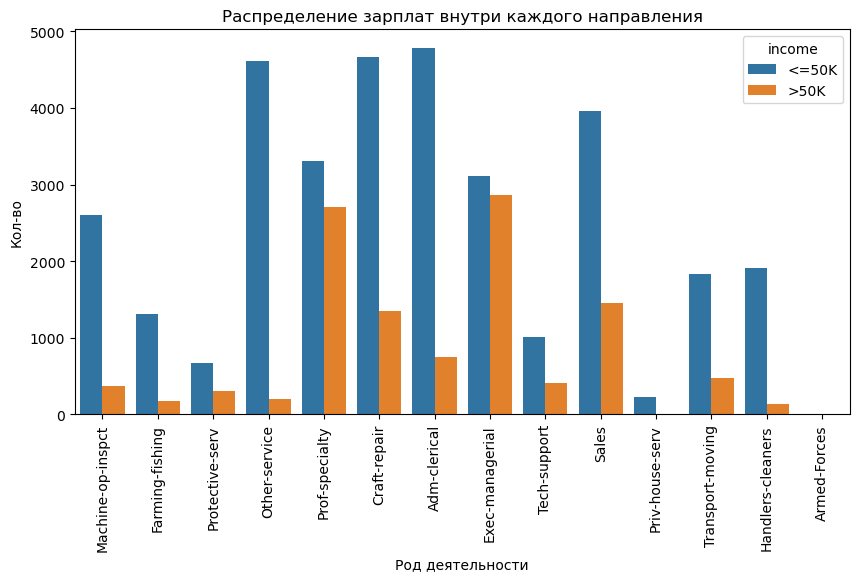

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
chart = sns.countplot(df, x="occupation", hue="income").set(
    xlabel="Род деятельности",
    ylabel="Кол-во",
    title="Распределение зарплат внутри каждого направления",
)

plt.xticks(rotation=90)
plt.show()


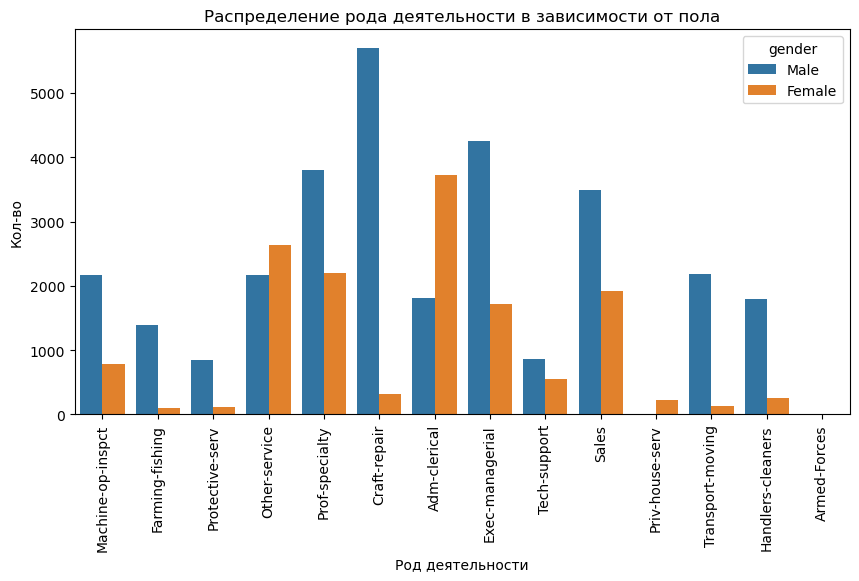

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
chart = sns.countplot(df, x="occupation", hue="gender").set(
    xlabel="Род деятельности",
    ylabel="Кол-во",
    title="Распределение рода деятельности в зависимости от пола",
)

plt.xticks(rotation=90)
plt.show()


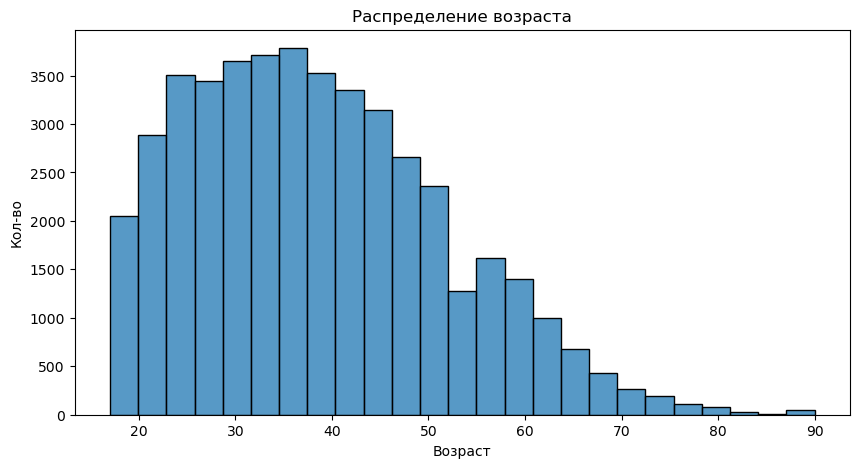

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=25)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Кол-во")
plt.show()


## c) преобразуйте категориальные признаки

In [11]:
X = pd.get_dummies(
    df,
    columns=[
        "workclass",
        "education",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "gender",
        "native-country",
    ],
)

del X["income"]

# 3. Разделение данных

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["income"])

y = pd.Series(le.transform(df["income"]))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Обучиние модели логистической регрессии и опорных векторов на обучающем множестве

## 4.1 Обучиние модели логистической регрессии

In [13]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Применим StandardScaler, т.к. не достигли сходимости

In [15]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline

LR_scaler_model = make_pipeline(StandardScaler(), LogisticRegression())
LR_scaler_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [16]:
LR_model.score(X_train, y_train)

0.7899770572463167

In [17]:
LR_model.score(X_test, y_test)

0.7954671088999448

In [18]:
LR_scaler_model.score(X_train, y_train)

0.8486054675622633

In [19]:
LR_scaler_model.score(X_test, y_test)

0.8511885019347706

## 4.2 Обучиние модели опорных векторов

In [20]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
# также сравним после масштабирования

from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline

clf_scaler = make_pipeline(StandardScaler(), SVC())
clf_scaler.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [22]:
clf.score(X_train, y_train)

0.7895624291677033

In [23]:
clf.score(X_test, y_test)

0.7946932006633499

In [24]:
clf_scaler.score(X_train, y_train)

0.8586118251928021

In [25]:
clf_scaler.score(X_test, y_test)

0.8512990602542841

# 6. Вводы по проделанной работе:

Результат **логистистической регрессии**:

До стандартизации - 0.79 (хорошо)

После стандартизации - 0.85 (лучше)

Резльутаты метода **опорных векторов** аналогичны:

До стандартизации - 0.79 (хорошо)

После стандартизации - 0.85 (лучше)

**Мнение** - оба подхода справляются с задачей достаточно хорошо.

Для улучшения результата требется поработать с данными:
- удалить выбросы
- убрать признакии, которые не оказывают значительного влияния
- увеличить объем датасета реальными или даже синтетическими данными